In [1]:
cd ..

/home/abdul/Desktop/ALS-Germline/Data-600WGS-QC/Preprocess(600 Samples)


In [2]:
cd data

/home/abdul/Desktop/ALS-Germline/Data-600WGS-QC/Preprocess(600 Samples)/data


In [7]:
import pandas as pd
import os
import glob
import numpy as np
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.SNV4GMOVAR"))
for f in csv_files:
    df = pd.read_csv(f, sep=',')
    f = f.replace("/home/abdul/Desktop/ALS-Germline/Data-600WGS-QC/Preprocess(600 Samples)/data/", "")
    f = f.replace(".SNV4GMOVAR", "")
    if f == 'Akkari':
        pd1 = df.rename(columns = {'Unnamed: 0':'ExternalSampleId.WGS'})
        pd1 = pd1.set_index('ExternalSampleId.WGS')
    else:
        df = df.rename(columns = {'Unnamed: 0':'ExternalSampleId.WGS'})
        df = df.set_index('ExternalSampleId.WGS')
        pd1 = pd1.merge(df, left_index = True, right_on = 'ExternalSampleId.WGS')
SNV4GMOVAR = pd1.T
#SNV4GMOVAR = SNV4GMOVAR.drop_duplicates(subset=['ExternalSampleId.WGS'], keep='first')
csv_files = glob.glob(os.path.join(path, "*.raw_wgs_metrics"))
for f in csv_files:
    df = pd.read_csv(f, sep=',') #, delimiter='\t'
    f = f.replace("/home/abdul/Desktop/ALS-Germline/Data-600WGS-QC/Preprocess(600 Samples)/data/", "")
    f = f.replace(".raw_wgs_metrics", "")
    if f == 'CPI_Cases': 
        pd1 = df
    else:
        pd1 = pd.concat((pd1, df), axis = 0)
pd1 = pd1.rename(columns = {'Unnamed: 0':'ExternalSampleId.WGS'})
pd1 = pd1.drop_duplicates(subset=['ExternalSampleId.WGS'], keep='first')
raw = pd1.set_index('ExternalSampleId.WGS')

path = '/home/abdul/Desktop/ALS-Germline/Data-600WGS-QC/Preprocess(600 Samples)/Analysis/'
meta_file = os.path.join(path,'All_WGS_19_04_2023.tsv') 
meta_data= pd.read_csv(meta_file, delimiter='\t')
meta_data['Cohort'] = meta_data['Cohort'].str.replace('Illumina Akkari' , 'Akkari')
meta_data.loc[meta_data['Cohort']=='NYG_WGS']['Cohort'] = meta_data.loc[meta_data['Cohort']=='NYG_WGS']['Batch']
meta_data = meta_data.rename(columns = {'Sample ID':'ExternalSampleId.WGS'})
meta_data = meta_data.set_index('ExternalSampleId.WGS')
X = SNV4GMOVAR.merge(meta_data, left_index = True, right_on = 'ExternalSampleId.WGS')
dataloader = X.iloc[:,0:19]

/tmp/ipykernel_3473725/4288185528.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data.loc[meta_data['Cohort']=='NYG_WGS']['Cohort'] = meta_data.loc[meta_data['Cohort']=='NYG_WGS']['Batch']


In [8]:
diff_index = SNV4GMOVAR.index.difference(raw.index)
diff_index

Index(['CPI507_PCRfree', 'GGSpi016'], dtype='object')

In [9]:
dataloader1  = X.iloc[:,0:9]
dataloader1 = dataloader1.merge(X['Cohort'], left_index = True, right_on = 'ExternalSampleId.WGS')


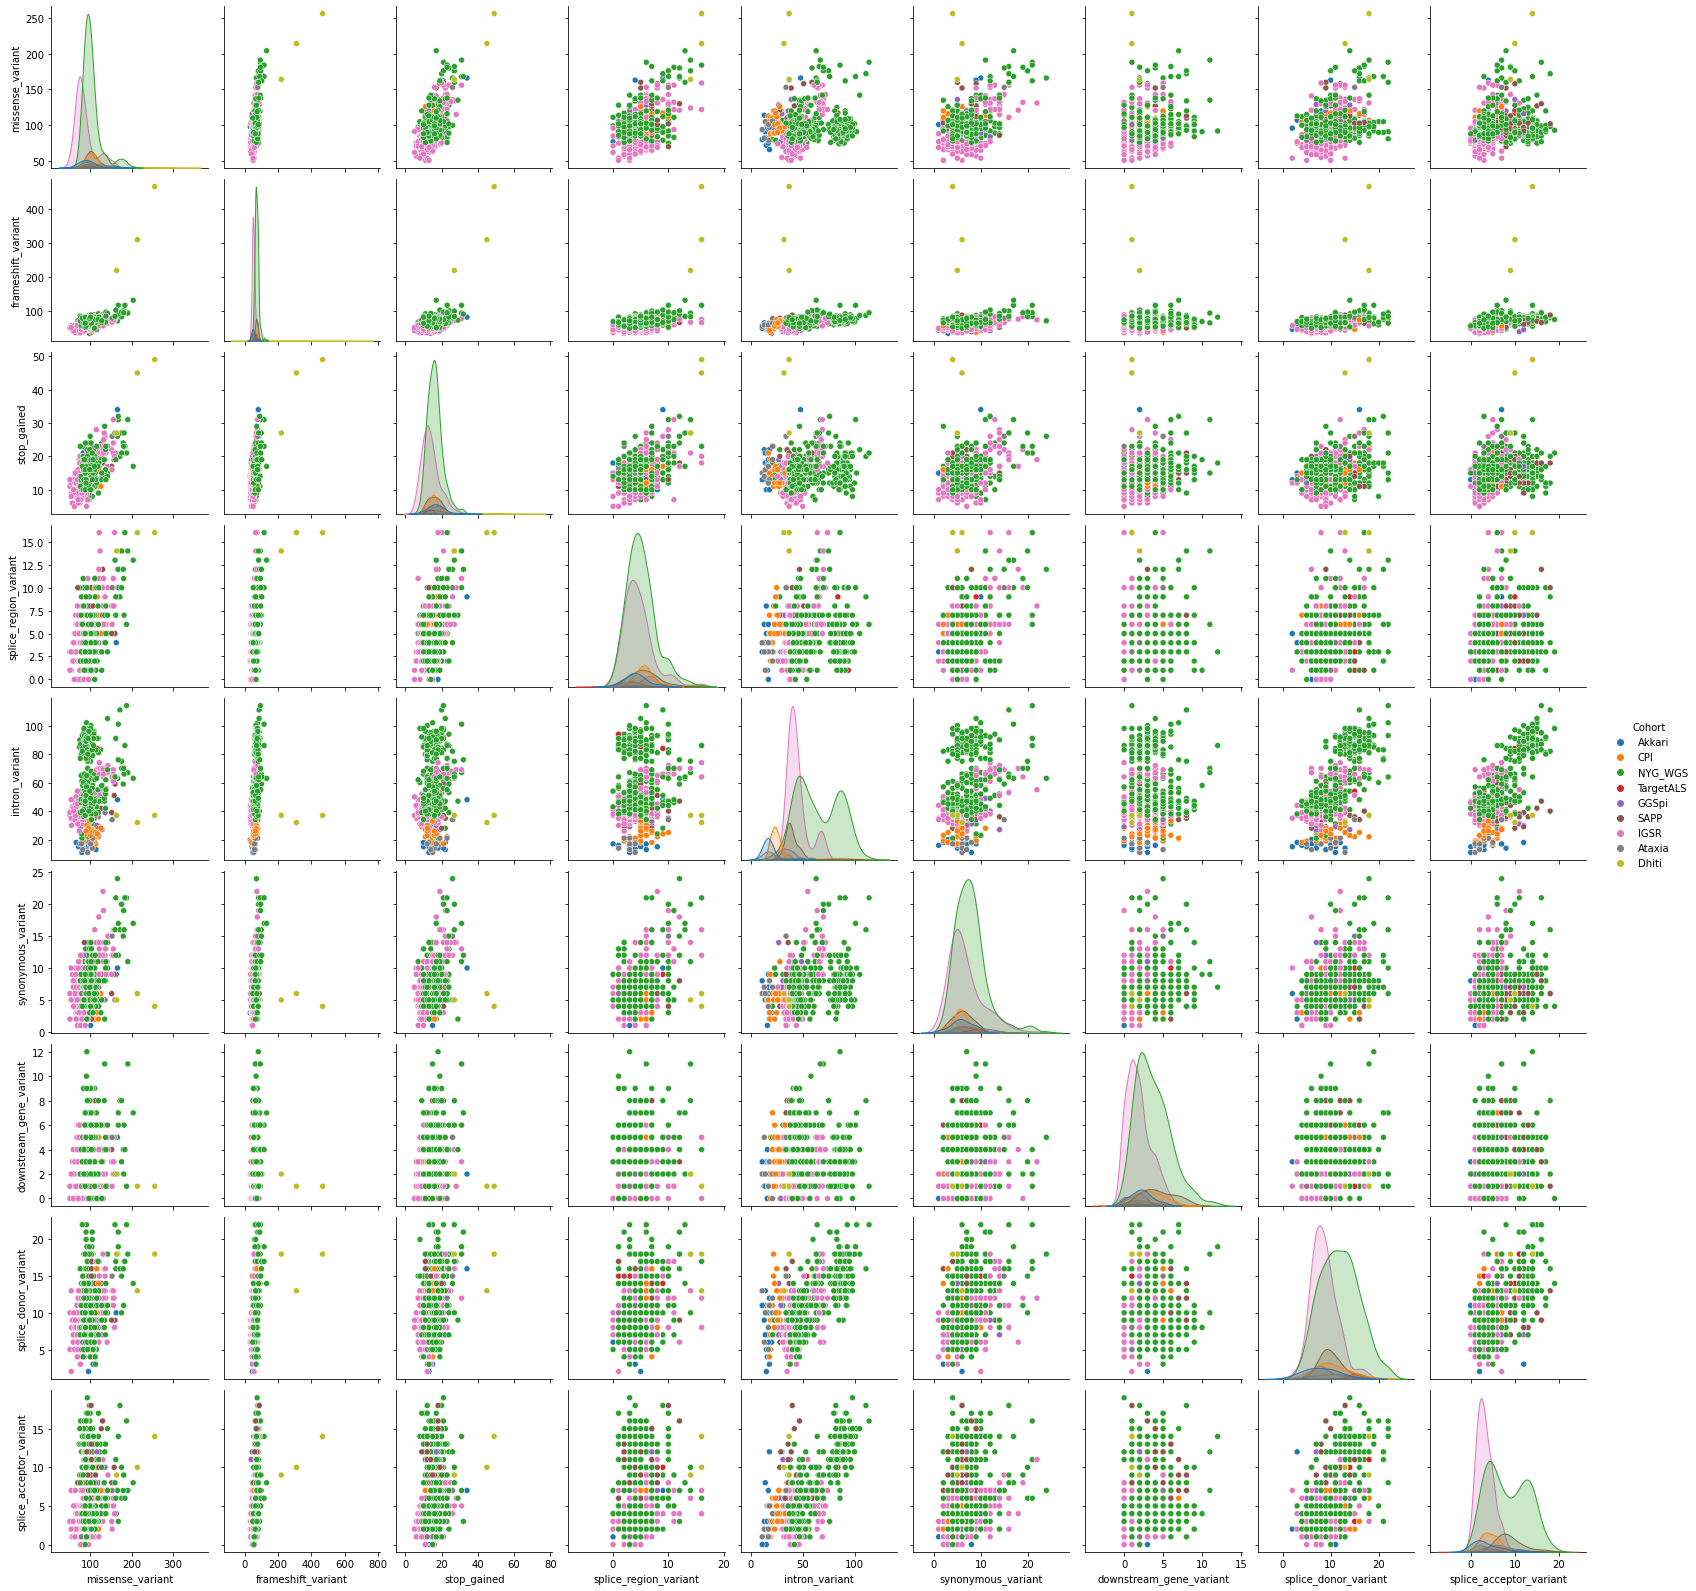

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(dataloader1,hue='Cohort')


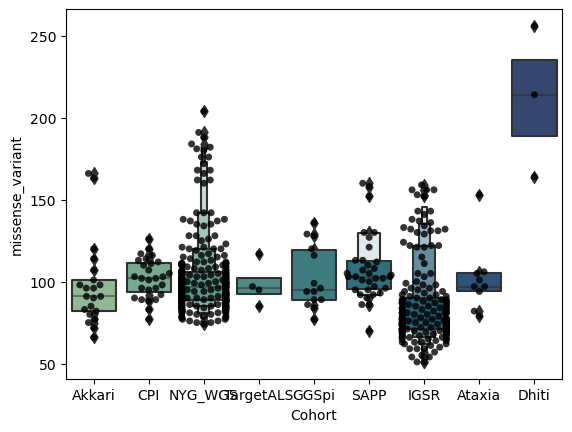

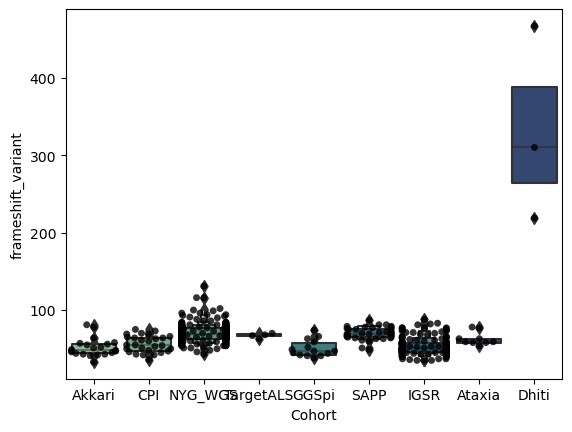

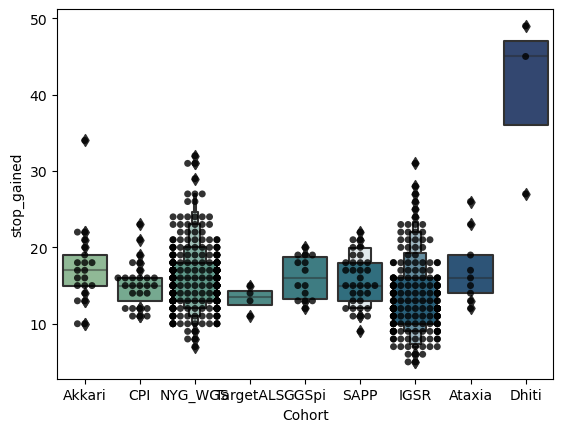

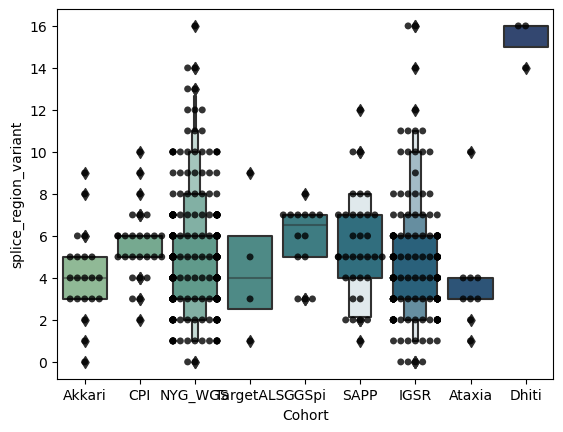

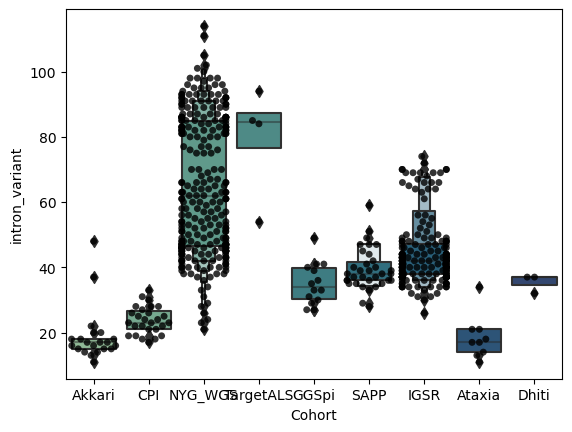

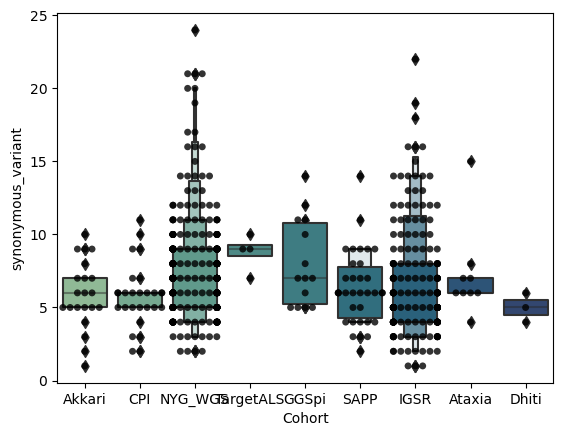

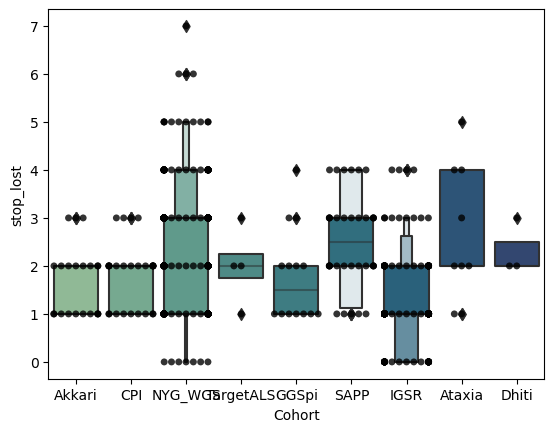

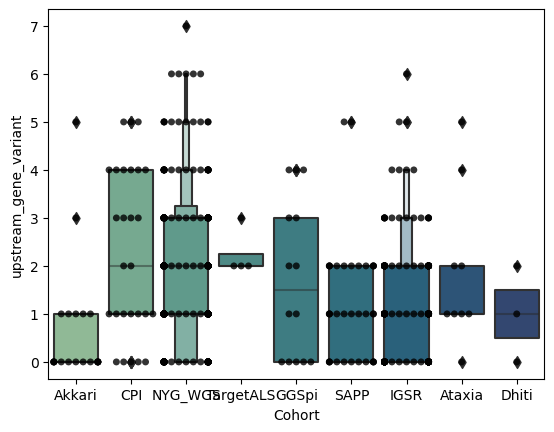

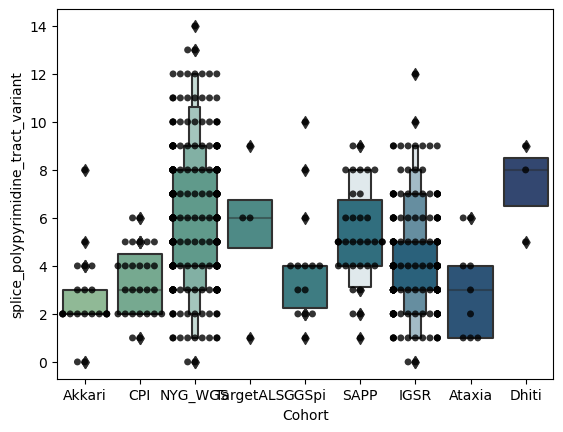

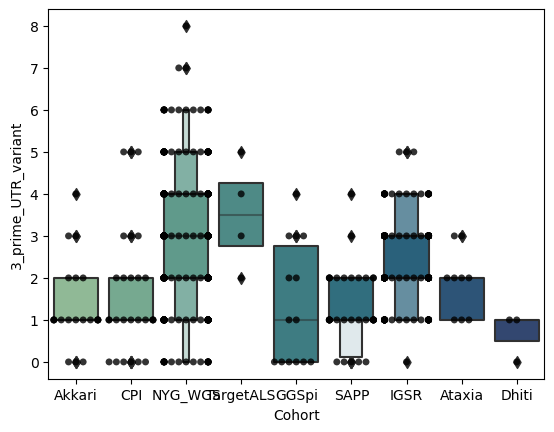

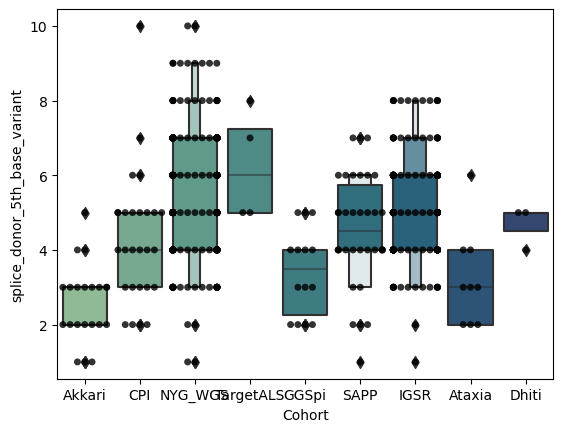

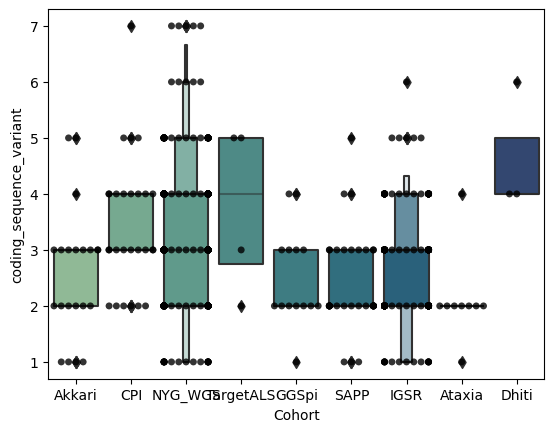

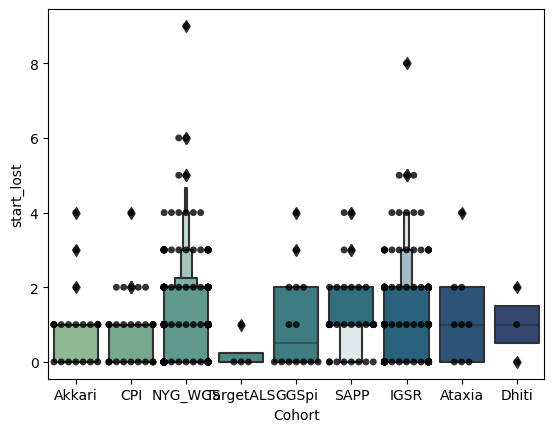

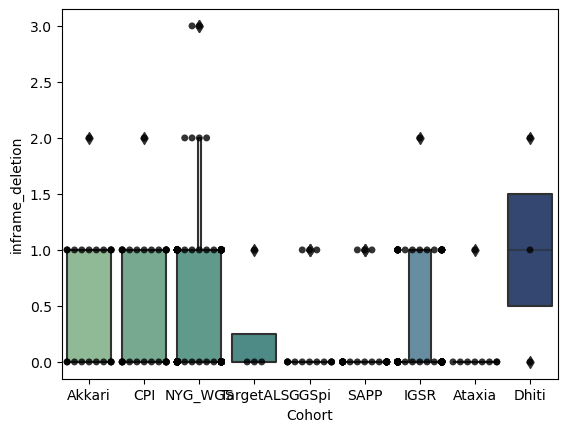

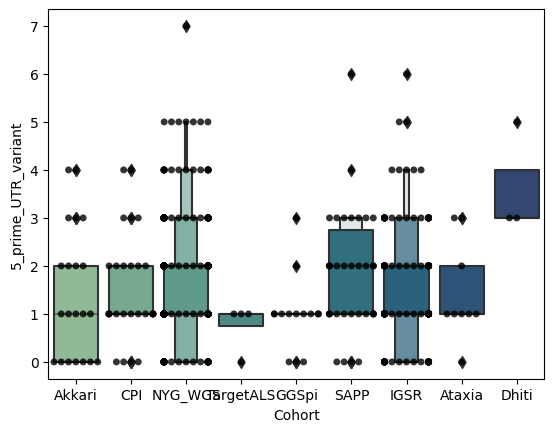

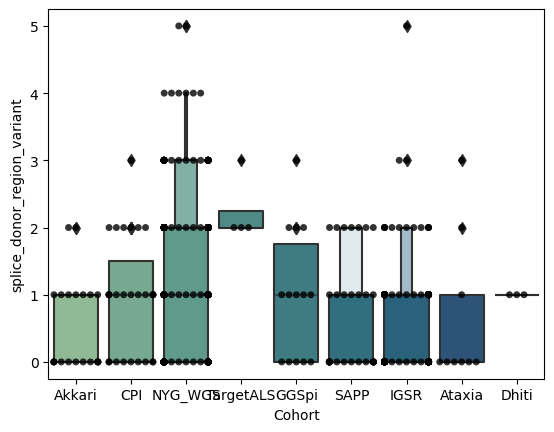

In [11]:
import warnings
warnings.filterwarnings('ignore')
for i in dataloader:
 sns.swarmplot(x = X['Cohort'], y = dataloader[i], color = "black", alpha = 0.8)
 sns.boxenplot(x = X['Cohort'], y = dataloader[i], palette="crest")
 plt.show()

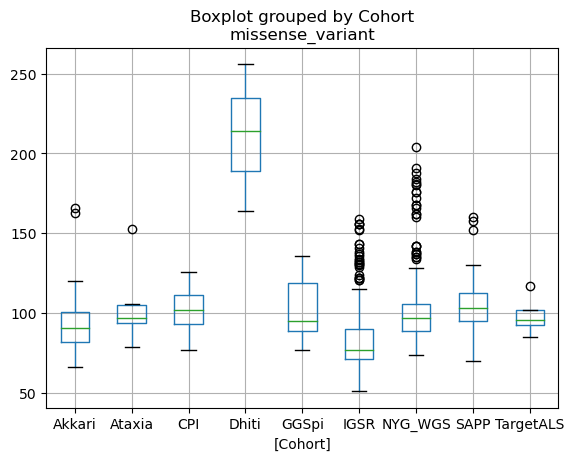

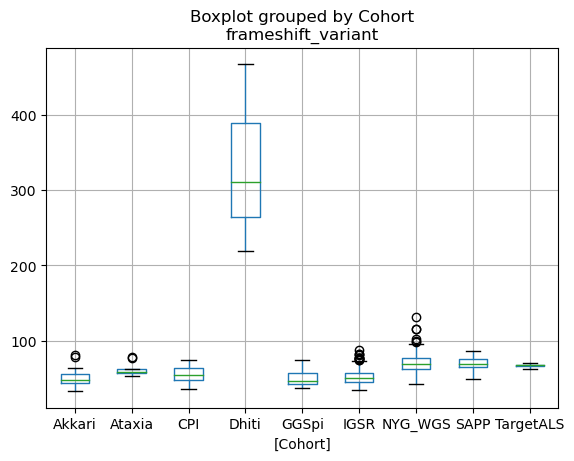

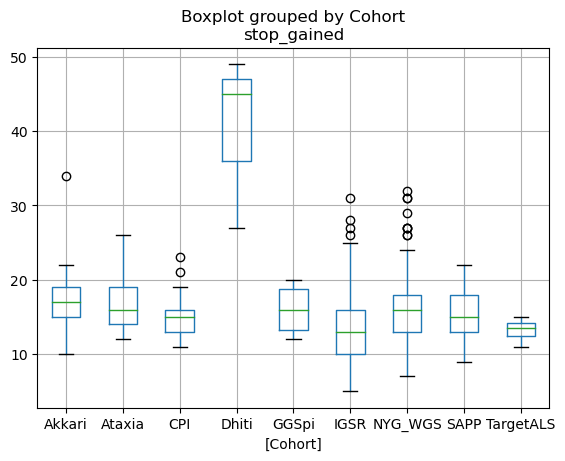

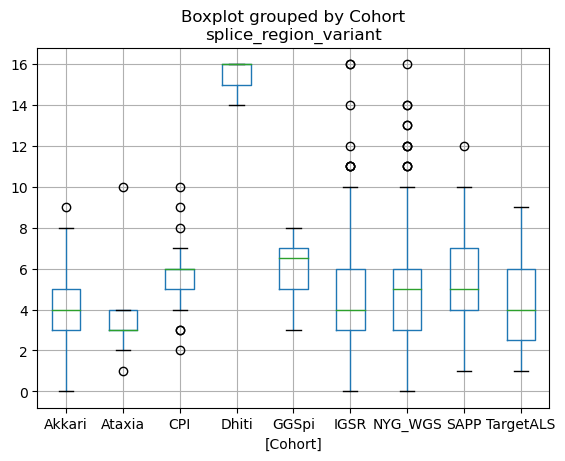

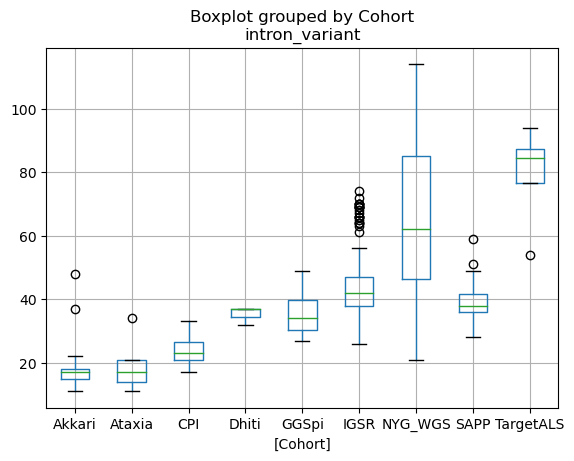

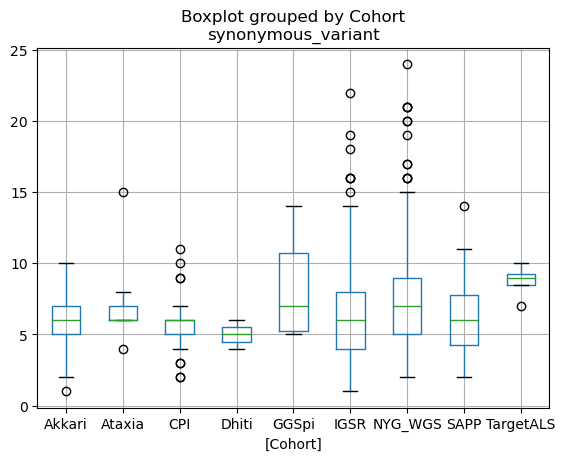

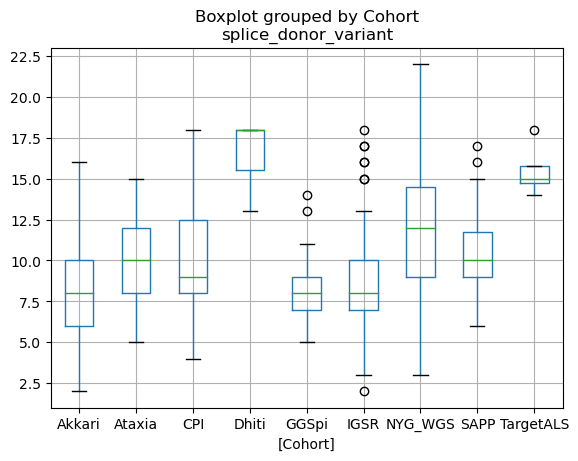

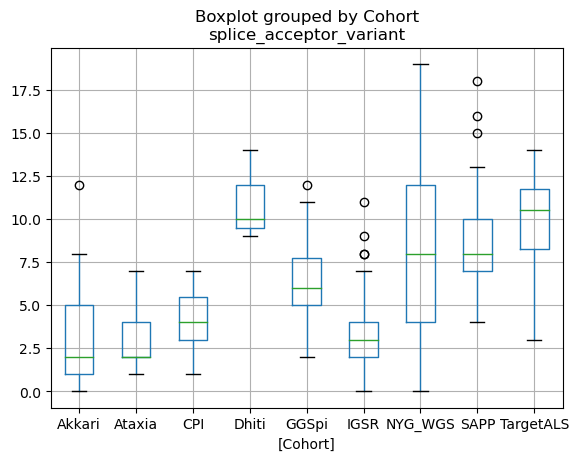

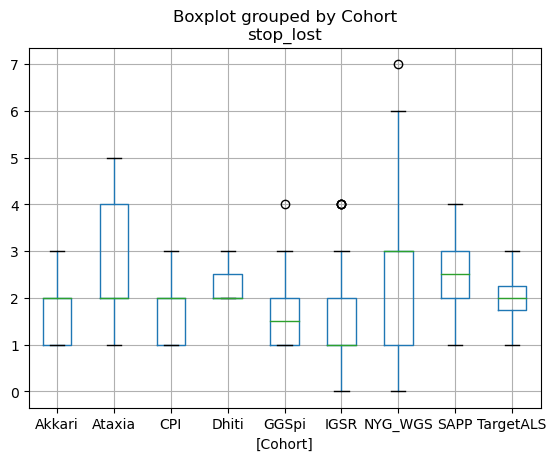

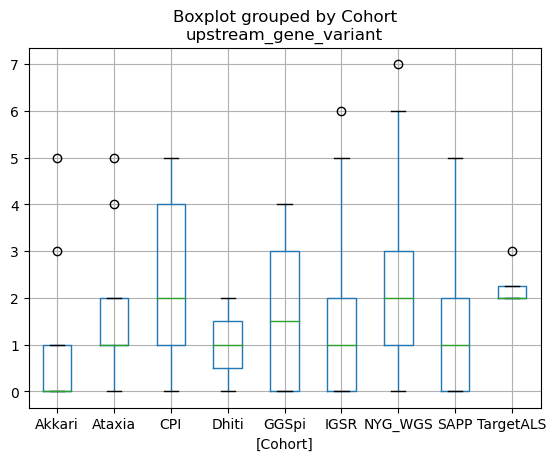

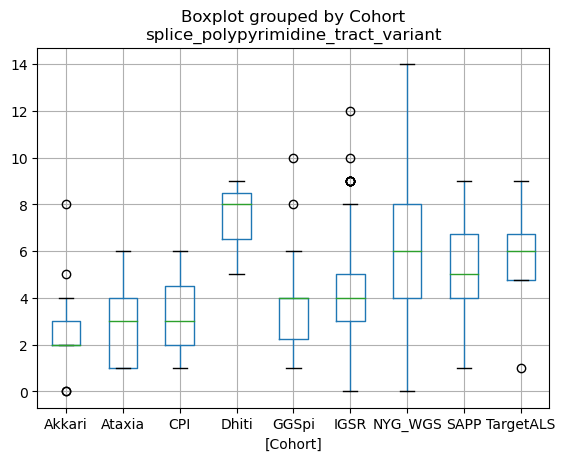

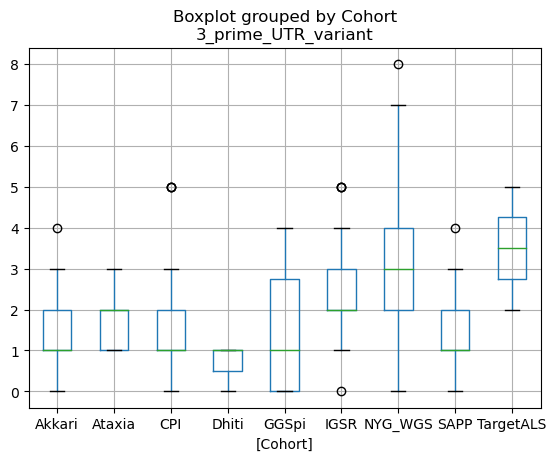

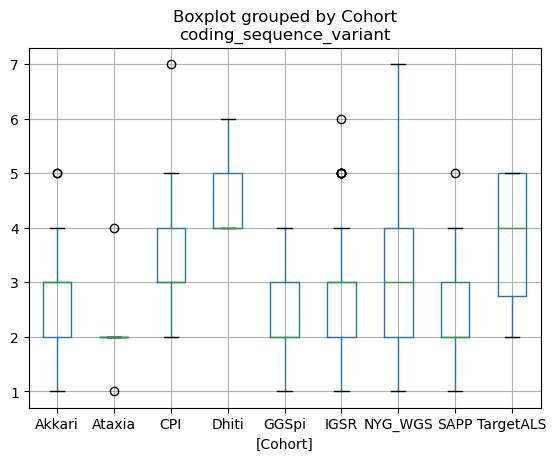

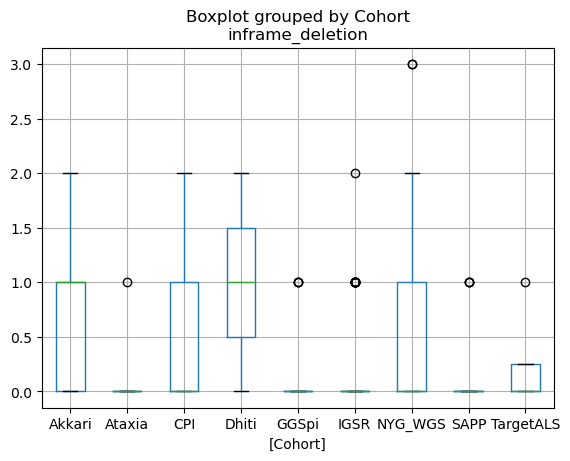

In [13]:
for i in dataloader:
 pd.DataFrame(dataloader[i]).merge(pd.DataFrame(X['Cohort']), left_index = True, right_on = 'ExternalSampleId.WGS').boxplot(by='Cohort')


In [14]:
raw = raw.iloc[:,1:2]
dataloader = raw.merge(dataloader, left_index = True, right_on = 'ExternalSampleId.WGS')
dataloader = dataloader.merge(meta_data, left_index = True, right_on = 'ExternalSampleId.WGS')


In [15]:
ax = sns.jointplot(x = 'missense_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

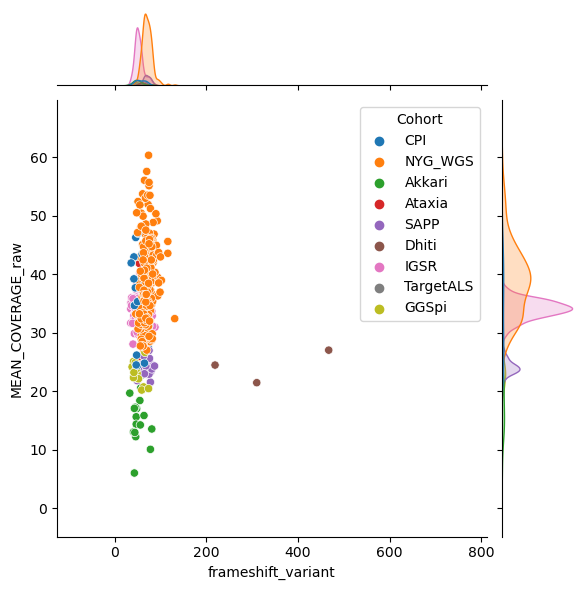

In [16]:
ax = sns.jointplot(x = 'frameshift_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

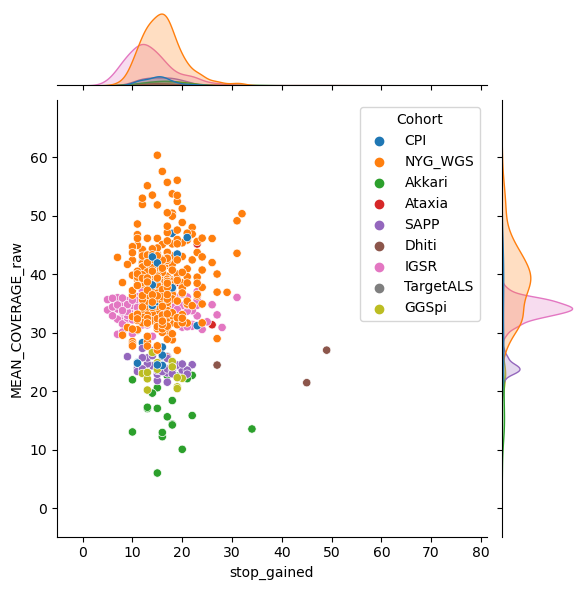

In [17]:
ax = sns.jointplot(x = 'stop_gained', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

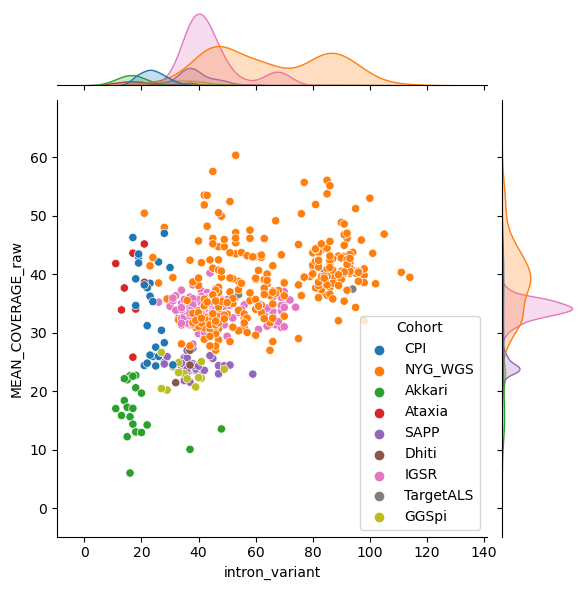

In [18]:
ax = sns.jointplot(x = 'intron_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

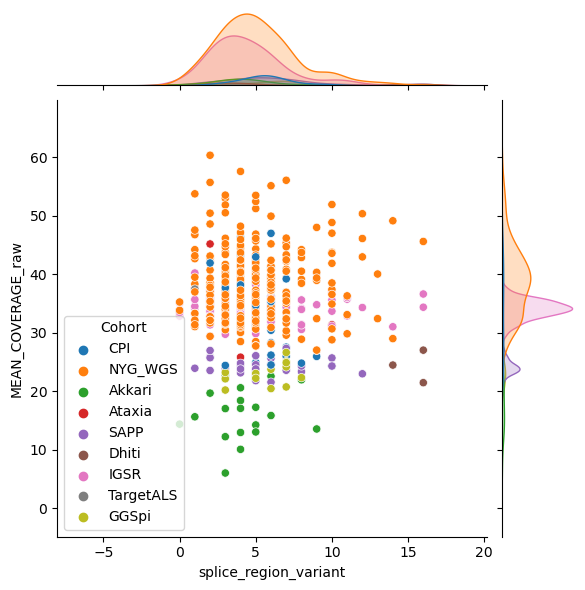

In [19]:
ax = sns.jointplot(x = 'splice_region_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

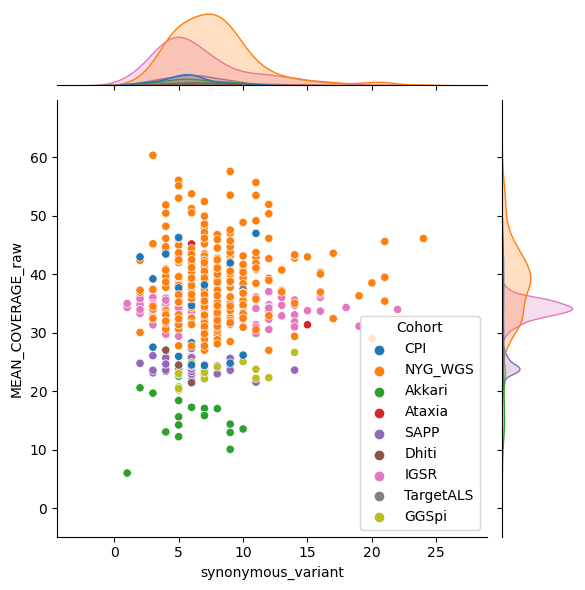

In [20]:
ax = sns.jointplot(x = 'synonymous_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

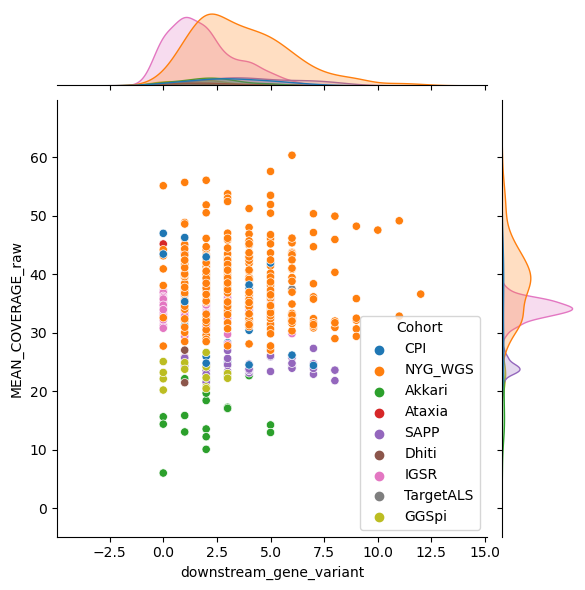

In [21]:
ax = sns.jointplot(x = 'downstream_gene_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

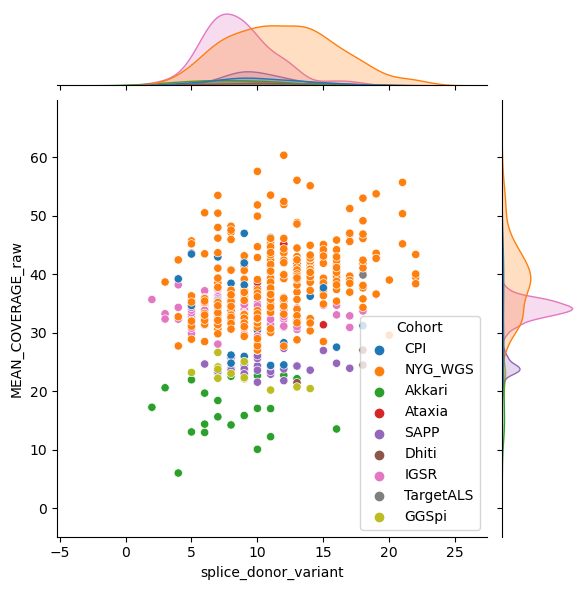

In [22]:
ax = sns.jointplot(x = 'splice_donor_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

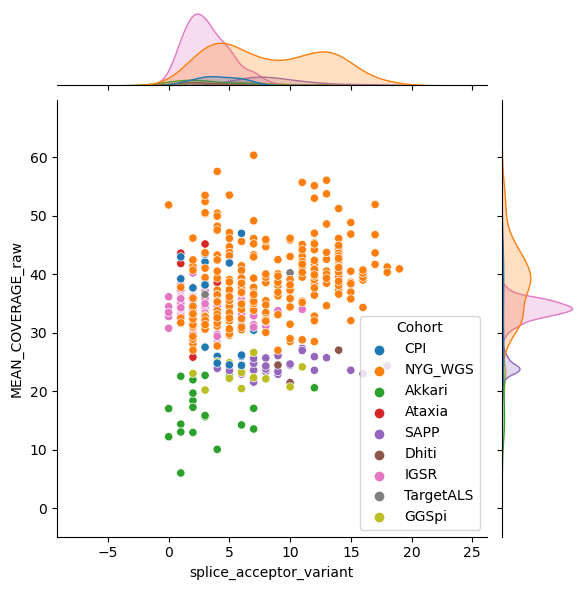

In [23]:
ax = sns.jointplot(x = 'splice_acceptor_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

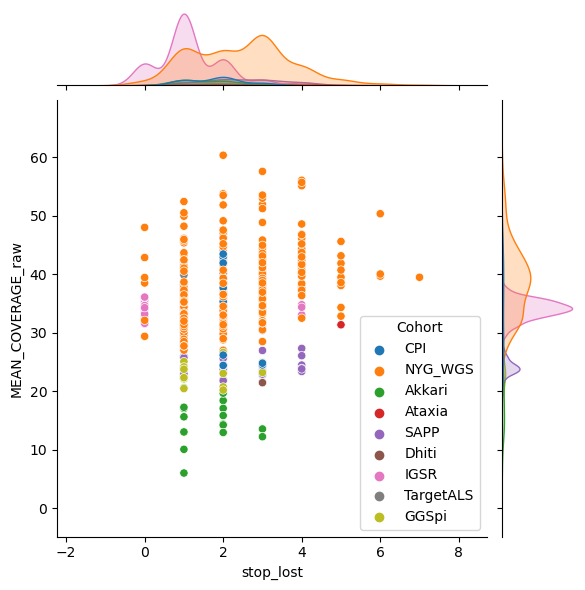

In [24]:
ax = sns.jointplot(x = 'stop_lost', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

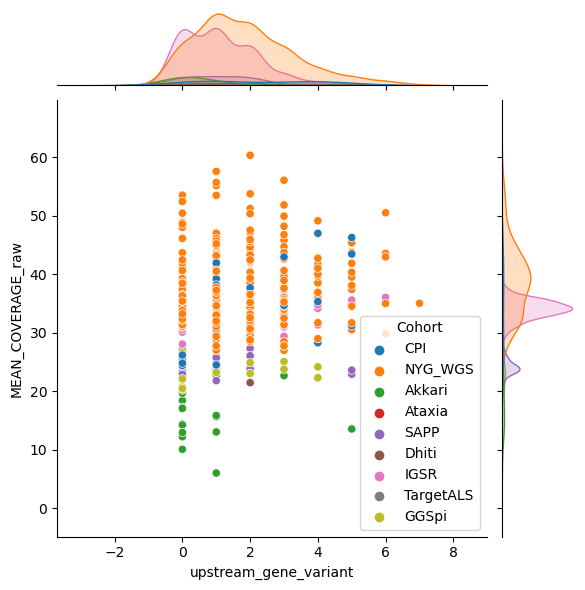

In [25]:
ax = sns.jointplot(x = 'upstream_gene_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

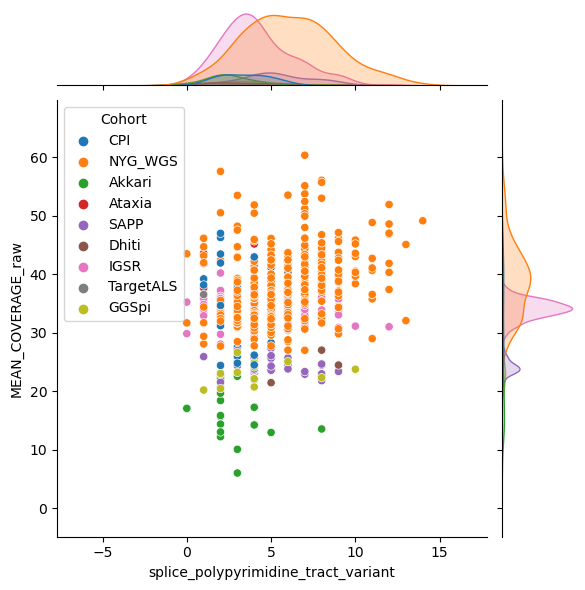

In [26]:
ax = sns.jointplot(x = 'splice_polypyrimidine_tract_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

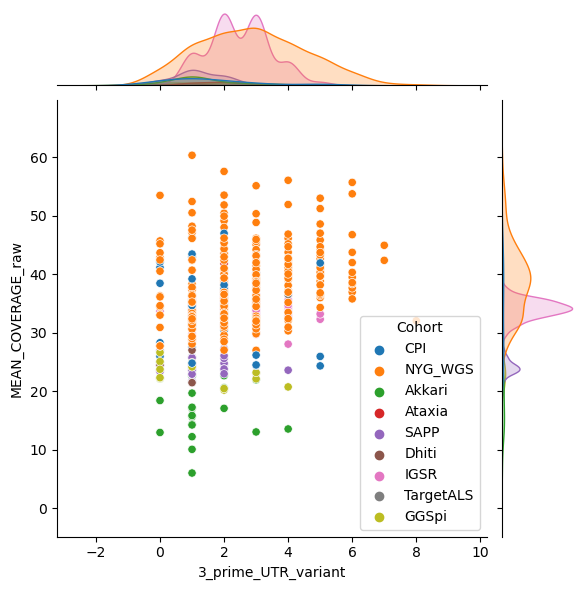

In [27]:
ax = sns.jointplot(x = '3_prime_UTR_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

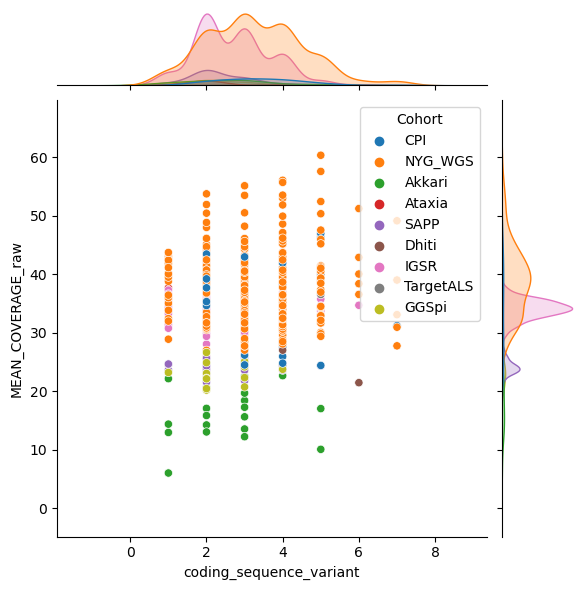

In [28]:
ax = sns.jointplot(x = 'coding_sequence_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

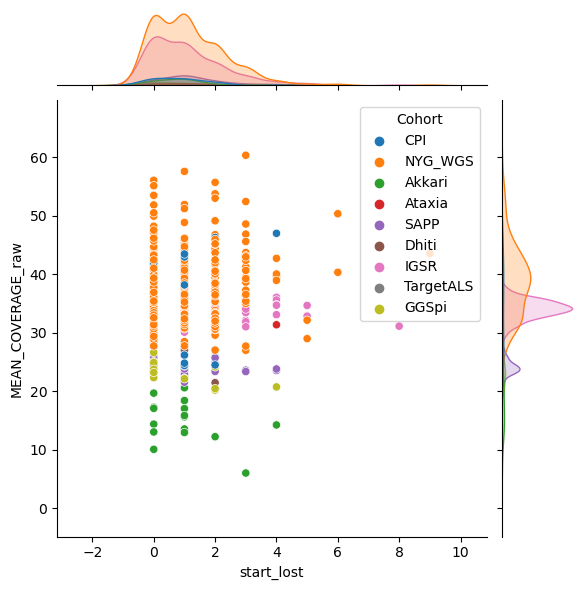

In [29]:
ax = sns.jointplot(x = 'start_lost', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

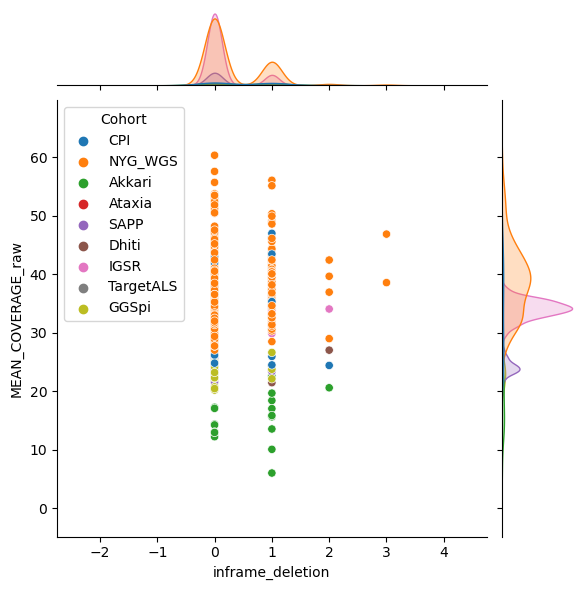

In [30]:
ax = sns.jointplot(x = 'inframe_deletion', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

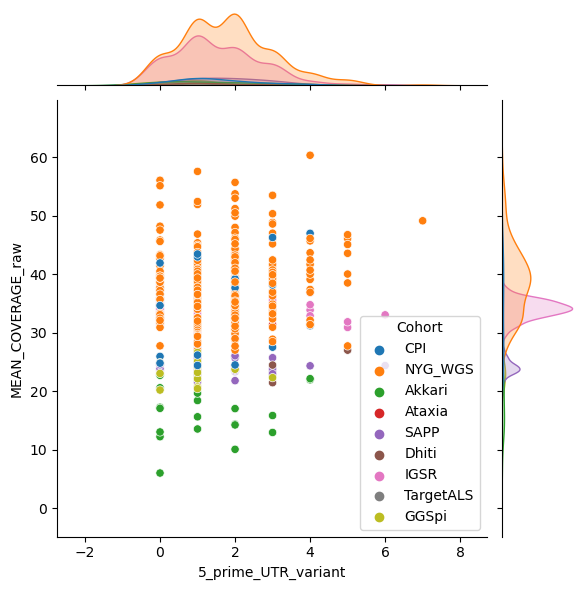

In [31]:
ax = sns.jointplot(x = '5_prime_UTR_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

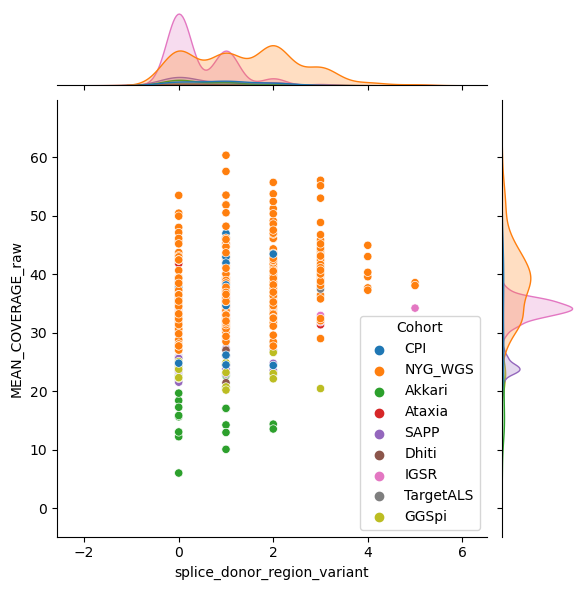

In [32]:
ax = sns.jointplot(x = 'splice_donor_region_variant', y ='MEAN_COVERAGE_raw', hue = 'Cohort', data = dataloader )

In [33]:

dataloader1 = pd.DataFrame(dataloader.iloc[:,1:20].T.sum())
dataloader1 = dataloader1.reset_index()
dataloader1 = dataloader1.rename(columns = {'index':'ExternalSampleId.WGS'})
dataloader1 = dataloader1.set_index('ExternalSampleId.WGS')
dataloader1 = dataloader1.rename(columns = {0:'SumVariants'})
dataloader1 = dataloader1.merge(raw, left_index = True, right_on = 'ExternalSampleId.WGS')

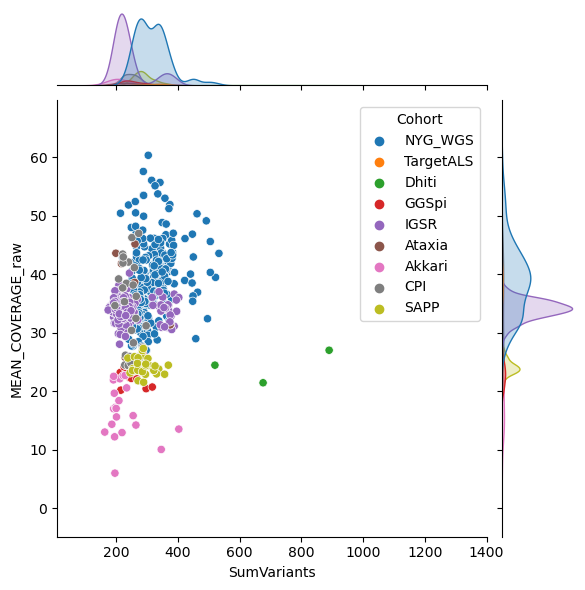

In [34]:
ax = sns.jointplot(x = 'SumVariants', y ='MEAN_COVERAGE_raw', hue = X['Cohort'], data = dataloader1 )